Hello! This is an example of multiple linear regression to predict student grades!
Features considered include study time, age, travel time, and more!

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:

# Load dataset
df = pd.read_csv('data/student_data.csv')

# Preprocessing
# Drop rows with missing values for simplicity
df = df.dropna()

# ALl provided features
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 
            'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
            'G1', 'G2']

# Target variable (final grade G3)
target = 'G3'

# Encode categorical features using pandas' Categorical codes
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                        'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                        'activities', 'nursery', 'higher', 'internet', 'romantic']

# Each differet category is given a different code
for col in categorical_features:
    df[col] = pd.Categorical(df[col]).codes

In [3]:


# Extract features and target
X = df[features].values
y = df[target].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
# standardizes data so that each feature will have a mean of 0 and a standard deviation of 1
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define the model
class MultilinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(MultilinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer (input_dim -> 1 output)

    def forward(self, x):
        return self.linear(x)

# Model, loss function, and optimizer
input_dim = X_train.shape[1]
model = MultilinearRegression(input_dim)

criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

# Training the model
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train)
    
    # Compute the loss
    loss = criterion(y_pred, y_train)
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Inverse the scaling of predictions and targets for comparison
y_pred_test = scaler_y.inverse_transform(y_pred_test.numpy())
y_test = scaler_y.inverse_transform(y_test.numpy())

# Display some results
print(f'Predicted Final Grades: {y_pred_test[:5].flatten()}')
print(f'Actual Final Grades: {y_test[:5].flatten()}')

Epoch [100/1000], Loss: 0.2588
Epoch [200/1000], Loss: 0.1778
Epoch [300/1000], Loss: 0.1577
Epoch [400/1000], Loss: 0.1504
Epoch [500/1000], Loss: 0.1471
Epoch [600/1000], Loss: 0.1452
Epoch [700/1000], Loss: 0.1440
Epoch [800/1000], Loss: 0.1431
Epoch [900/1000], Loss: 0.1425
Epoch [1000/1000], Loss: 0.1420
Test Loss: 0.2413
Predicted Final Grades: [ 6.5296397 11.637386   2.5219924  7.991848   8.624774 ]
Actual Final Grades: [10. 12.  5. 10.  9.]


Visualizations: 

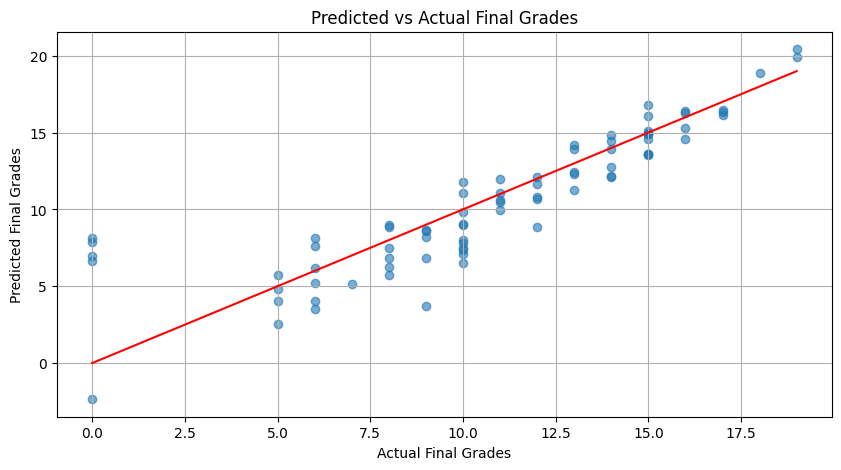

In [4]:
# VPlotting predicted vs actual final grades
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.title('Predicted vs Actual Final Grades')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.grid(True)
plt.show()